In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def P(psi, theta, K):
    return psi - 1 - K/(2*np.pi) * np.sin(2*np.pi*theta)

def W(psi, w):
    return w/4*(2-psi)*(2-2*psi+psi**2)

In [3]:
def tokamap(psi, theta, K, w):
    p = P(psi, theta, K)
    psi_evolved = 0.5*(p + np.sqrt(p**2 + 4*psi))
    theta_evolved = theta + W(psi_evolved, w) - K/((2*np.pi)**2)/((1+psi_evolved)**2)*np.cos(2*np.pi*theta)
    return np.array([
        psi_evolved,
        theta_evolved % 1
    ])

In [4]:
x = np.array([0., 0.5])

In [5]:
x = tokamap(x[0], x[1], 3.7, 1.)
print(x)

[0.         0.59372209]


In [6]:
xi = np.linspace(0, 1, 7)
Xi = np.meshgrid(xi, xi)
Xi = np.array(Xi).reshape(2, -1)

In [7]:
nev = 1000
Ev = np.empty((Xi.shape[0], Xi.shape[1], nev))

In [8]:
K = 3.7
w = 1.0

for i, x in enumerate(Xi.T):
    Ev[:, i, 0] = x
    xt = x.copy()
    for j in range(nev-1):
        xt = tokamap(xt[0], xt[1], K, w)
        Ev[:, i, j+1] = xt

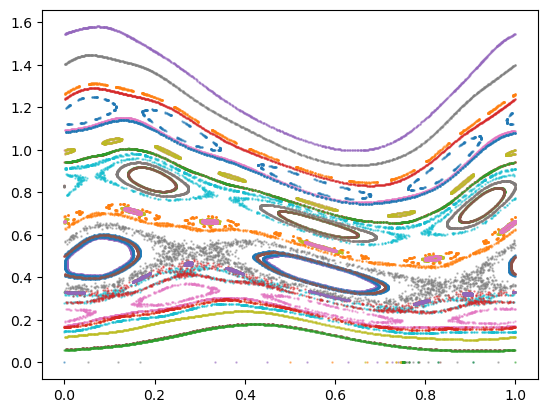

In [9]:
for i in range(len(Ev[0,:,0])):
    plt.scatter(Ev[1, i, :], Ev[0, i, :], s=0.5, alpha=0.5)